In [1]:
import os
import random
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import date, timedelta
from scipy.stats import skew, kurtosis

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K

2023-07-31 14:14:57.742665: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 14:14:57.896921: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-07-31 14:14:57.896953: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-07-31 14:14:58.447405: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [2]:
import pandas as pd
import json

with open("posts_with_newsURLs.json") as f:
    data = []
    for line in f:
        json_data = json.loads(line)
        data.append(json_data)

df = pd.DataFrame(data)

In [3]:
df.head()

,_id,type,collected_on,data,id
0,{'$oid': '5b26afa37135690bc89ba801'},posts,2018-04-08 15:55:33,"{'liked': False, 'revised_at': None, 'is_premi...",20077000
1,{'$oid': '5b26afa37135690bc89ba807'},posts,2018-04-07 19:51:11,"{'liked': False, 'revised_at': None, 'is_premi...",20083000
2,{'$oid': '5b26afa37135690bc89ba819'},posts,2018-04-29 21:39:32,"{'liked': False, 'revised_at': None, 'is_premi...",20102000
3,{'$oid': '5b26afa37135690bc89ba826'},posts,2018-04-08 19:18:01,"{'liked': False, 'revised_at': None, 'is_premi...",20115000
4,{'$oid': '5b26afa37135690bc89ba848'},posts,2018-04-29 23:20:12,"{'liked': False, 'revised_at': None, 'is_premi...",20152000


In [4]:
df.dtypes

_id             object
type            object
collected_on    object
data            object
id              object
dtype: object

In [5]:
df_times=[]
df_body=[]

In [6]:
for i in df.index:
    df_times.append(df["data"][i]["created_at"])

In [7]:
for i in df.index:
    df_body.append(df["data"][i]["body"])

In [8]:
import re

In [9]:
x = df_body[3]
s1 = re.sub('http://\S+|https://\S+', '', x)
print(df_body[3])


http://www.foxnews.com/world/2018/02/18/iran-flier-texted-before-deadly-plane-crash-may-god-protect-us.html 

Another crash in Iran. #Qanon


In [10]:
df_text_without_urls=[]
for x in df_body :
    y= re.sub('http://\S+|https://\S+', '', x)
    if(len(y)>0):
        df_text_without_urls.append(y)

In [11]:
urls=[]

In [12]:
for i in df_body:
    m=str(i)
    s=re.search("(?P<url>https?://[^\s]+)", m).group(0)
    urls.append(s)

In [13]:
print(len(df_body))
print(len(urls))
print(len(df_text_without_urls))

1345279
1345279
988371


In [14]:
times=[]
URLS =[]
for i in range(0,len(df_text_without_urls)):
    times.append(df_times[i])
    URLS.append(urls[i])


In [15]:
print(URLS[0])

http://www.latimes.com/local/lanow/la-me-weinstein-prosecution-la-20180217-story.html


In [16]:
print(len(URLS))
print(len(times))

988371
988371


In [17]:
type(times[0])

str

In [18]:
import re
text = 'Hello world \n I wrote some random    text    here \t \n\n. I am trying      to remove extra whitespace but keep line breaks, tabs, ...etc'
text = re.sub(' +', ' ', text).strip()
text = text.replace("\n\r\n", "")
print(text)

Hello world 
 I wrote some random text here 	 

. I am trying to remove extra whitespace but keep line breaks, tabs, ...etc


In [19]:
df_text_without_urls_filtered =[]
for x in df_text_without_urls:
    new_str = re.sub(r'[^\w\s]', '', x)
    new_str = new_str.replace("\n\r\n", "")
    df_text_without_urls_filtered.append(new_str)

In [20]:
df_required = pd.DataFrame({'created_at' : times,'expanded_urls' : URLS,'text' : df_text_without_urls_filtered})

In [21]:
df_required.head()

,created_at,expanded_urls,text
0,2018-02-18T21:52:01+00:00,http://www.latimes.com/local/lanow/la-me-weins...,Ive always said this Cannabis in whatever form...
1,2018-02-19T00:17:25+00:00,http://dailycaller.com/2015/10/12/remember-the...,Another crash in Iran Qanon
2,2018-02-19T10:02:34+00:00,https://www.leafly.com/news/health/a-guide-to-...,GERMANYS RIGHT WING POPULIST PARTY AFD IS NOW ...
3,2018-02-19T16:25:48+00:00,http://www.foxnews.com/world/2018/02/18/iran-f...,hamradio HamRadio shortwave Numbers stations T...
4,2018-02-20T05:12:18+00:00,http://www.thegatewaypundit.com/2018/02/sarah-...,Good Grief What a joke you are J J


In [22]:
df_required.dtypes

created_at       object
expanded_urls    object
text             object
dtype: object

In [23]:
df_required['text'][4]

'Good Grief What a joke you are J J '

In [24]:
df_required['created_at'] = pd.to_datetime(df_required['created_at'])

In [25]:
df_required['expanded_urls'] = df_required['expanded_urls'].astype("string")

In [26]:
df_required['text'] = df_required['text'].astype("string")

In [27]:
data2=pd.DataFrame(pd.read_excel("MediaBias.xlsx"))

In [28]:
data3 = data2[['Media source', 'URL', 'Political Leaning']].copy()

In [29]:
#SPLITTING THE ENTIRE DATASET OF MEDIABIAS INTO LEFT,CENTRE AND RIGHT

In [30]:
left_media=[]
right_media=[]
centre_media=[]
left_lean_media=[]
right_lean_media=[]

In [31]:
data3.rename(columns = {'Media source':'Media_source', 'Political Leaning':'Political_Leaning'}, inplace = True)
data3.Media_source = data3.Media_source.astype('string')
data3.Political_Leaning=data3.Political_Leaning.astype('string')
data3.URL=data3.URL.astype('string')

In [32]:
data3.dropna(inplace=True)

In [33]:
data3.head()

,Media_source,URL,Political_Leaning
0,ABC News (Online),https://abcnews.go.com/,Left Lean
1,Above The Law,https://abovethelaw.com/,Left Lean
2,Abridge News,https://abridgenews.com/,Mixed
3,AJ+,https://www.ajplus.net/,Left
4,Al Jazeera,https://www.aljazeera.com/,Left Lean


In [34]:
for ind in data3.index:
    if(data3['Political_Leaning'][ind]=="Left"):
        if(data3['Media_source'][ind] not in left_media):
            left_media.append(data3['Media_source'][ind])
    elif(data3['Political_Leaning'][ind]=="Right"):
        if(data3['Media_source'][ind] not in right_media):
            right_media.append(data3['Media_source'][ind])
    elif((data3['Political_Leaning'][ind]=="Center" ) or (data3['Political_Leaning'][ind]=="Mixed")):
        if(data3['Media_source'][ind] not in centre_media):
            centre_media.append(data3['Media_source'][ind])
    elif(data3['Political_Leaning'][ind]=="Left Lean"):
        if(data3['Media_source'][ind] not in left_lean_media):
            left_lean_media.append((data3['Media_source'][ind]))
    elif(data3['Political_Leaning'][ind]=="Right Lean"):
        if(data3['Media_source'][ind] not in right_lean_media):
            right_lean_media.append((data3['Media_source'][ind]))
    

In [35]:
hashmap_media={}

In [36]:
for ind in data3.index:
    hashmap_media[data3['Media_source'][ind]]=data3['URL'][ind]

In [37]:
import re

In [38]:
df_required.isnull().values.any()

False

In [39]:
df_required.dtypes

created_at       datetime64[ns, UTC]
expanded_urls                 string
text                          string
dtype: object

In [40]:
print(len(left_lean_media))
print(len(right_lean_media))
print(len(left_media))
print(len(right_media))

95
47
54
50


In [41]:
left_suburls=[]
right_suburls=[]
centre_suburls=[]
left_leaning_suburls=[]
right_leaning_suburls=[]

In [42]:
for i in range(0,len(left_media)):
    if hashmap_media.get(left_media[i]) not in left_suburls:
        left_suburls.append(hashmap_media.get(left_media[i]))

In [43]:
for i in range(0,len(right_media)):
    if hashmap_media.get(right_media[i]) not in right_suburls:
        right_suburls.append(hashmap_media.get(right_media[i]))

In [44]:
for i in range(0,len(centre_media)):
    if hashmap_media.get(centre_media[i]) not in centre_suburls:
        centre_suburls.append(hashmap_media.get(centre_media[i]))

In [45]:
for i in range(0,len(left_lean_media)):
    if hashmap_media.get(left_lean_media[i]) not in left_leaning_suburls:
        left_leaning_suburls.append(hashmap_media.get(left_lean_media[i]))

In [46]:
for i in range(0,len(right_lean_media)):
    if hashmap_media.get(right_lean_media[i]) not in right_leaning_suburls:
        right_leaning_suburls.append(hashmap_media.get(right_lean_media[i]))

In [47]:
print(left_suburls)

['https://www.ajplus.net/', 'https://www.alternet.org/', 'http://www.aquinas.edu/thesaint/', 'https://www.arkansasonline.com/', 'https://blockclubchicago.org/', 'https://www.bloomberg.com/', 'https://browngirlmagazine.com/', 'https://www.buzzfeednews.com/', 'https://www.care2.com/', 'https://chicagocrusader.com/', 'https://chicagodefender.com/', 'https://www.cnn.com/', 'https://www.cnn.com/opinions', 'https://www.commondreams.org/', 'https://www.currentaffairs.org/', 'https://www.thedailybeast.com/', 'https://www.dailychela.com/', 'https://www.dailykos.com/', 'https://www.democracynow.org/', 'https://www.fcnp.com/', 'https://www.heralddemocrat.com/', 'https://hiplatina.com/', 'https://www.huffpost.com/', 'https://jacobinmag.com/', 'https://jezebel.com', 'https://www.leafly.com', 'https://mashable.com', 'https://www.metroweekly.com', 'https://wearemitu.com', 'https://www.motherjones.com', 'https://www.msnbc.com', 'https://newrepublic.com', 'https://www.nydailynews.com', 'https://nymag.c

In [48]:
left_timestamps=[]
right_timestamps=[]
centre_timestamps=[]
left_leaning_timestamps=[]
right_leaning_timestamps=[]

In [49]:
x=df_required[["created_at","expanded_urls","text"]].to_numpy()

In [50]:
print(x)
print(len(x))
print(type(x[1]))
#left=np.array(left_suburls)

[[Timestamp('2018-02-18 21:52:01+0000', tz='UTC')
  'http://www.latimes.com/local/lanow/la-me-weinstein-prosecution-la-20180217-story.html'
  'Ive always said this Cannabis in whatever form is massively effective for many illnesses Unfortunately the number of people displaying signs of allergy has risen significantly\xa0']
 [Timestamp('2018-02-19 00:17:25+0000', tz='UTC')
  'http://dailycaller.com/2015/10/12/remember-the-2007-harvard-study-showing-more-guns-led-to-less-crime/'
  ' Another crash in Iran Qanon']
 [Timestamp('2018-02-19 10:02:34+0000', tz='UTC')
  'https://www.leafly.com/news/health/a-guide-to-cannabis-allergies-and-symptoms'
  'GERMANYS RIGHT WING POPULIST PARTY AFD IS NOW THE SECOND MOST POPULAR PARTY WITH 15 OF THE VOTE\n\nEUROSKEPTIC AFD HAS NOW SURPASS LEFT LEANING SOCIAL DEMOCRATS IN POLL FOR THE FIRST TIME\n\nBritFam']
 ...
 [Timestamp('2018-09-25 13:08:26+0000', tz='UTC')
  'http://www.foxnews.com/sports/2018/09/25/minnesota-vikings-defender-everson-griffen-threat

In [51]:
try_formats = [
    '%Y-%m-%d %H:%M:%S%z', 
    '%a %b %d %H:%M:%S %z %Y', 
    '%m/%d/%Y %H:%M:%S', 
]

In [52]:
from datetime import datetime

In [53]:
for y in x:
    for sub in left_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                #date_object = None  # Declare the variable with a default value
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        break
                    except ValueError:
                        pass
                
                
                tuple_timestamp_text = (date_object.date(), y[2])
                left_timestamps.append(tuple_timestamp_text)


In [54]:
print(len(left_timestamps))

21414


In [55]:
for y in x:
    for sub  in centre_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                tuple_timestamp_text=(date_object.date(),y[2])
                centre_timestamps.append(tuple_timestamp_text)
                

In [56]:
for y in x:
    for sub  in right_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                tuple_timestamp_text=(date_object.date(),y[2])
                right_timestamps.append(tuple_timestamp_text)
                

In [57]:
for y in x:
    for sub  in left_leaning_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                tuple_timestamp_text=(date_object.date(),y[2])
                left_leaning_timestamps.append(tuple_timestamp_text)
                

In [58]:
for y in x:
    for sub  in right_leaning_suburls:
        if y[1] is not np.nan:
            if sub in str(y[1]):
                y[0] = str(y[0])
                for format_string in try_formats:
                    try:
                        date_object = datetime.strptime(y[0], format_string)
                        #print(f"Format string: {format_string}")
                        
                        break
                    except ValueError:
                        pass
                
                #y[0] = datetime.strptime(y[0], '%a %b %d %H:%M:%S %z %Y')
                tuple_timestamp_text=(date_object.date(),y[2])
                right_leaning_timestamps.append(tuple_timestamp_text)
                

In [59]:
print(len(left_timestamps))
print(len(right_timestamps))
print(len(centre_timestamps))
print(len(left_leaning_timestamps))
print(len(right_leaning_timestamps))


21414
293468
67695
65390
109880


In [60]:
left_hashmap  ={}
right_hashmap ={}
centre_hashmap={}
left_lean_hashmap={}
right_lean_hashmap={}

In [61]:
left_timestamps[0]

(datetime.date(2018, 2, 19),
 'GERMANYS RIGHT WING POPULIST PARTY AFD IS NOW THE SECOND MOST POPULAR PARTY WITH 15 OF THE VOTE\n\nEUROSKEPTIC AFD HAS NOW SURPASS LEFT LEANING SOCIAL DEMOCRATS IN POLL FOR THE FIRST TIME\n\nBritFam')

In [62]:
for t in left_timestamps:
    if(t[0] not in left_hashmap):
        left_hashmap[t[0]] = []
    left_hashmap[t[0]].append(t[1])

In [63]:
for t in right_timestamps:
    if(t[0] not in right_hashmap):
        right_hashmap[t[0]] = []
    right_hashmap[t[0]].append(t[1])

In [64]:
for t in centre_timestamps:
    if(t[0] not in centre_hashmap):
        centre_hashmap[t[0]] = []
    centre_hashmap[t[0]].append(t[1])

In [65]:
for t in left_leaning_timestamps:
    if(t[0] not in left_lean_hashmap):
        left_lean_hashmap[t[0]] = []
    left_lean_hashmap[t[0]].append(t[1])

In [66]:
for t in right_leaning_timestamps:
    if(t[0] not in right_lean_hashmap):
        right_lean_hashmap[t[0]] = []
    right_lean_hashmap[t[0]].append(t[1])

In [67]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [68]:
 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):

# Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict




In [69]:
left_cache={}
right_cache={}
centre_cache={}
left_lean_cache={}
right_lean_cache={}

In [70]:
for t in left_hashmap:
    #print(t)
    if t not in left_cache:
        left_cache[t] =[]
    
    for text in left_hashmap[t]:
        left_cache[t].append(sentiment_scores(text))

In [71]:
for t in right_hashmap:
    #print(t)
    if t not in right_cache:
        right_cache[t] =[]
    
    for text in right_hashmap[t]:
        right_cache[t].append(sentiment_scores(text))

In [72]:
for t in centre_hashmap:
    #print(t)
    if t not in centre_cache:
        centre_cache[t] =[]
   
    for text in centre_hashmap[t]:
        centre_cache[t].append(sentiment_scores(text))

In [73]:
for t in left_lean_hashmap:
    #print(t)
    if t not in left_lean_cache:
        left_lean_cache[t] =[]
    
    for text in left_lean_hashmap[t]:
        left_lean_cache[t].append(sentiment_scores(text))

In [74]:
for t in right_lean_hashmap:
    #print(t)
    if t not in right_lean_cache:
        right_lean_cache[t] =[]
    
    for text in right_lean_hashmap[t]:
        right_lean_cache[t].append(sentiment_scores(text))

In [75]:
#negatives stacked plot.

In [76]:
left_negatives={}
right_negatives={}
centre_negatives={}
left_lean_negatives={}
right_lean_negatives={}

In [77]:
for t in left_cache:
    denominator = 0
    numerator =0
    for x in left_cache[t]:
        numerator+=x['neg']
        denominator+=1
    average = numerator/denominator
    left_negatives[t] = average
    
    

In [78]:
for t in right_cache:
    denominator = 0
    numerator =0
    for x in right_cache[t]:
        numerator+=x['neg']
        denominator+=1
    average = numerator/denominator
    right_negatives[t] = average
    

In [79]:
for t in centre_cache:
    denominator = 0
    numerator =0
    for x in centre_cache[t]:
        numerator+=x['neg']
        denominator+=1
    average = numerator/denominator
    centre_negatives[t] = average
    

In [80]:
for t in left_lean_cache:
    denominator = 0
    numerator =0
    for x in left_lean_cache[t]:
        numerator+=x['neg']
        denominator+=1
    average = numerator/denominator
    left_lean_negatives[t] = average
    

In [81]:
for t in right_lean_cache:
    denominator = 0
    numerator =0
    for x in right_lean_cache[t]:
        numerator+=x['neg']
        denominator+=1
    average = numerator/denominator
    right_lean_negatives[t] = average
    

In [82]:
left_negatives1 = {'Date':left_negatives.keys(), 'negative_scores':left_negatives.values()}
right_negatives1 = {'Date':right_negatives.keys(), 'negative_scores':right_negatives.values()}
centre_negatives1 = {'Date':centre_negatives.keys(), 'negative_scores':centre_negatives.values()}
left_lean_negatives1 = {'Date':left_lean_negatives.keys(), 'negative_scores':left_lean_negatives.values()}
right_lean_negatives1 = {'Date':right_lean_negatives.keys(), 'negative_scores':right_lean_negatives.values()}


In [83]:
left_negatives_df = pd.DataFrame.from_dict(left_negatives1)
right_negatives_df = pd.DataFrame.from_dict(right_negatives1)
centre_negatives_df = pd.DataFrame.from_dict(centre_negatives1)
left_lean_negatives_df = pd.DataFrame.from_dict(left_lean_negatives1)
right_lean_negatives_df = pd.DataFrame.from_dict(right_lean_negatives1)

In [84]:
left_negatives_filtered_df= left_negatives_df[(left_negatives_df['Date']>=pd.Timestamp(2018,5,1)) & (left_negatives_df['Date']<=pd.Timestamp(2018,12,1))]

/home/srinath/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [85]:
right_negatives_filtered_df= right_negatives_df[(right_negatives_df['Date']>=pd.Timestamp(2018,5,1)) & (right_negatives_df['Date']<=pd.Timestamp(2018,12,1))]
centre_negatives_filtered_df= centre_negatives_df[(centre_negatives_df['Date']>=pd.Timestamp(2018,5,1)) & (centre_negatives_df['Date']<=pd.Timestamp(2018,12,1))]
left_lean_negatives_filtered_df= left_lean_negatives_df[(left_lean_negatives_df['Date']>=pd.Timestamp(2018,5,1)) & (left_lean_negatives_df['Date']<=pd.Timestamp(2018,12,1))]
right_lean_negatives_filtered_df= right_lean_negatives_df[(right_lean_negatives_df['Date']>=pd.Timestamp(2018,5,1)) & (right_lean_negatives_df['Date']<=pd.Timestamp(2018,12,1))]


In [86]:
merged_df = pd.merge(left_negatives_filtered_df, right_negatives_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, centre_negatives_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, left_lean_negatives_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, right_lean_negatives_filtered_df, on='Date', how='inner')


merged_df.columns = ['Date', 'left_tweets_mean_negative_score', 'right_tweets_mean_negative_score', 'centre_tweets_mean_negative_score', 'left_leaning_tweets_mean_negative_score', 'right_leaning_tweets_mean_negative_score']


merged_df['Date'] = pd.to_datetime(merged_df['Date'])

/tmp/ipykernel_873451/1042235266.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'negative_scores_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, left_lean_negatives_filtered_df, on='Date', how='inner')


In [87]:
merged_df

,Date,left_tweets_mean_negative_score,right_tweets_mean_negative_score,centre_tweets_mean_negative_score,left_leaning_tweets_mean_negative_score,right_leaning_tweets_mean_negative_score
0,2018-05-01,0.123079,0.131390,0.122179,0.137715,0.138901
1,2018-05-02,0.131110,0.132923,0.157203,0.152934,0.142091
2,2018-05-03,0.140156,0.131637,0.143996,0.147004,0.140370
3,2018-05-28,0.130283,0.138633,0.152276,0.140185,0.135275
4,2018-05-29,0.116855,0.126978,0.136323,0.139614,0.140904
...,...,...,...,...,...,...
151,2018-07-06,0.121594,0.134553,0.135198,0.118290,0.134713
152,2018-07-05,0.125875,0.130294,0.120398,0.127373,0.123533
153,2018-07-31,0.120721,0.141756,0.128516,0.126556,0.126541
154,2018-07-01,0.186267,0.110173,0.137744,0.160300,0.124815


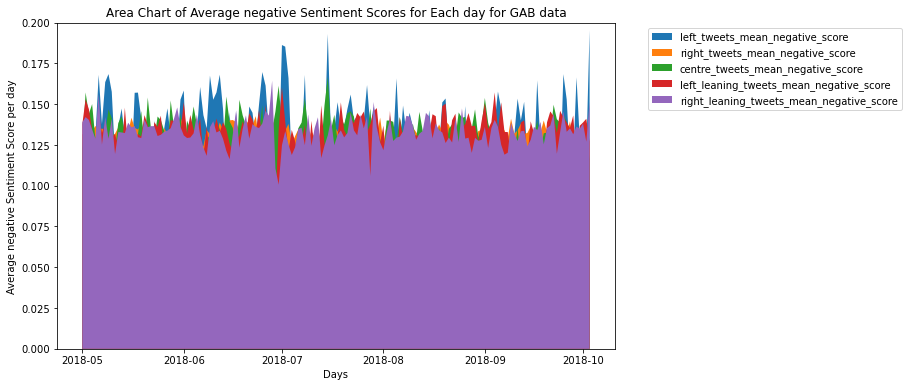

In [88]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set the timestamp column as the index
merged_df.set_index('Date', inplace=True)

# Group by day
merged_df_grouped = merged_df.groupby(pd.Grouper(freq='D'))

# Plotting area chart for each score
plt.figure(figsize=(10, 6))
for score in ['left_tweets_mean_negative_score', 'right_tweets_mean_negative_score', 'centre_tweets_mean_negative_score', 'left_leaning_tweets_mean_negative_score', 'right_leaning_tweets_mean_negative_score']:
    plt.stackplot(merged_df_grouped.groups.keys(), merged_df_grouped[score].sum(), alpha=1)


plt.legend(['left_tweets_mean_negative_score', 'right_tweets_mean_negative_score', 'centre_tweets_mean_negative_score', 'left_leaning_tweets_mean_negative_score', 'right_leaning_tweets_mean_negative_score'],loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Days')
plt.ylabel('Average negative Sentiment Score per day')
plt.title('Area Chart of Average negative Sentiment Scores for Each day for GAB data')

plt.ylim(0, 0.2)
#plt.grid(True)
plt.show()


In [89]:
"""
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

monthly_data = merged_df.groupby(pd.Grouper(key='Date', freq='M')).mean()

# Plot the area chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.stackplot(monthly_data.index, monthly_data.values.T, labels=monthly_data.columns)

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Average Negative Sentiment Scores per month')
plt.title('Monthly Negative Sentiment Scores for political leaned tweets')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.show()
"""

"\nmerged_df['Date'] = pd.to_datetime(merged_df['Date'])\n\nmonthly_data = merged_df.groupby(pd.Grouper(key='Date', freq='M')).mean()\n\n# Plot the area chart\nplt.figure(figsize=(10, 6))  # Adjust the figure size as needed\nplt.stackplot(monthly_data.index, monthly_data.values.T, labels=monthly_data.columns)\n\n# Set labels and title\nplt.xlabel('Months')\nplt.ylabel('Average Negative Sentiment Scores per month')\nplt.title('Monthly Negative Sentiment Scores for political leaned tweets')\n\n# Add legend\nplt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')\n\n# Show the chart\nplt.show()\n"

In [90]:
#positive stacked plot

In [91]:
left_positives={}
right_positives={}
centre_positives={}
left_lean_positives={}
right_lean_positives={}

In [92]:
for t in left_cache:
    denominator = 0
    numerator =0
    for x in left_cache[t]:
        numerator+=x['pos']
        denominator+=1
    average = numerator/denominator
    left_positives[t] = average
    
    

In [93]:
for t in right_cache:
    denominator = 0
    numerator =0
    for x in right_cache[t]:
        numerator+=x['pos']
        denominator+=1
    average = numerator/denominator
    right_positives[t] = average
    

In [94]:
for t in centre_cache:
    denominator = 0
    numerator =0
    for x in centre_cache[t]:
        numerator+=x['pos']
        denominator+=1
    average = numerator/denominator
    centre_positives[t] = average
    

In [95]:
for t in left_lean_cache:
    denominator = 0
    numerator =0
    for x in left_lean_cache[t]:
        numerator+=x['pos']
        denominator+=1
    average = numerator/denominator
    left_lean_positives[t] = average
    

In [96]:
for t in right_lean_cache:
    denominator = 0
    numerator =0
    for x in right_lean_cache[t]:
        numerator+=x['pos']
        denominator+=1
    average = numerator/denominator
    right_lean_positives[t] = average
    

In [97]:
left_positives1 = {'Date':left_positives.keys(), 'positive_scores':left_positives.values()}
right_positives1 = {'Date':right_positives.keys(), 'positive_scores':right_positives.values()}
centre_positives1 = {'Date':centre_positives.keys(), 'positive_scores':centre_positives.values()}
left_lean_positives1 = {'Date':left_lean_positives.keys(), 'positive_scores':left_lean_positives.values()}
right_lean_positives1 = {'Date':right_lean_positives.keys(), 'positive_scores':right_lean_positives.values()}


In [98]:
left_positives_df = pd.DataFrame.from_dict(left_positives1)
right_positives_df = pd.DataFrame.from_dict(right_positives1)
centre_positives_df = pd.DataFrame.from_dict(centre_positives1)
left_lean_positives_df = pd.DataFrame.from_dict(left_lean_positives1)
right_lean_positives_df = pd.DataFrame.from_dict(right_lean_positives1)

In [99]:
left_positives_filtered_df= left_positives_df[(left_positives_df['Date']>=pd.Timestamp(2018,5,1)) & (left_positives_df['Date']<=pd.Timestamp(2018,12,1))]
right_positives_filtered_df= right_positives_df[(right_positives_df['Date']>=pd.Timestamp(2018,5,1)) & (right_positives_df['Date']<=pd.Timestamp(2018,12,1))]
centre_positives_filtered_df= centre_positives_df[(centre_positives_df['Date']>=pd.Timestamp(2018,5,1)) & (centre_positives_df['Date']<=pd.Timestamp(2018,12,1))]
left_lean_positives_filtered_df= left_lean_positives_df[(left_lean_positives_df['Date']>=pd.Timestamp(2018,5,1)) & (left_lean_positives_df['Date']<=pd.Timestamp(2018,12,1))]
right_lean_positives_filtered_df= right_lean_positives_df[(right_lean_positives_df['Date']>=pd.Timestamp(2018,5,1)) & (right_lean_positives_df['Date']<=pd.Timestamp(2018,12,1))]



/home/srinath/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [100]:
merged_df = pd.merge(left_positives_filtered_df, right_positives_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, centre_positives_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, left_lean_positives_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, right_lean_positives_filtered_df, on='Date', how='inner')


merged_df.columns = ['Date', 'left_tweets_mean_positive_score', 'right_tweets_mean_positive_score', 'centre_tweets_mean_positive_score', 'left_leaning_tweets_mean_positive_score', 'right_leaning_tweets_mean_positive_score']


merged_df['Date'] = pd.to_datetime(merged_df['Date'])

/tmp/ipykernel_873451/1899825588.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'positive_scores_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, left_lean_positives_filtered_df, on='Date', how='inner')


In [101]:
merged_df

,Date,left_tweets_mean_positive_score,right_tweets_mean_positive_score,centre_tweets_mean_positive_score,left_leaning_tweets_mean_positive_score,right_leaning_tweets_mean_positive_score
0,2018-05-01,0.066763,0.086534,0.083196,0.076820,0.082839
1,2018-05-02,0.081740,0.086039,0.073444,0.083864,0.090002
2,2018-05-03,0.084104,0.076244,0.079918,0.066360,0.078884
3,2018-05-28,0.091000,0.081395,0.091862,0.080701,0.088533
4,2018-05-29,0.080904,0.080466,0.084341,0.078030,0.082424
...,...,...,...,...,...,...
151,2018-07-06,0.101906,0.085886,0.088453,0.092310,0.080762
152,2018-07-05,0.107531,0.079065,0.088081,0.086873,0.090563
153,2018-07-31,0.147814,0.083886,0.103294,0.077991,0.072516
154,2018-07-01,0.128400,0.077450,0.116103,0.065300,0.070113


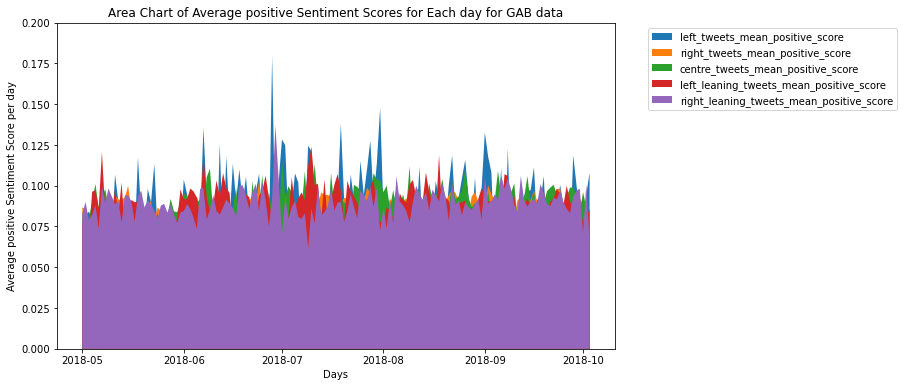

In [102]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set the timestamp column as the index
merged_df.set_index('Date', inplace=True)

# Group by day
merged_df_grouped = merged_df.groupby(pd.Grouper(freq='D'))

# Plotting area chart for each score
plt.figure(figsize=(10, 6))
for score in ['left_tweets_mean_positive_score', 'right_tweets_mean_positive_score', 'centre_tweets_mean_positive_score', 'left_leaning_tweets_mean_positive_score', 'right_leaning_tweets_mean_positive_score']:
    plt.stackplot(merged_df_grouped.groups.keys(), merged_df_grouped[score].sum(), alpha=1)


plt.legend(['left_tweets_mean_positive_score', 'right_tweets_mean_positive_score', 'centre_tweets_mean_positive_score', 'left_leaning_tweets_mean_positive_score', 'right_leaning_tweets_mean_positive_score'],loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Days')
plt.ylabel('Average positive Sentiment Score per day')
plt.title('Area Chart of Average positive Sentiment Scores for Each day for GAB data')

plt.ylim(0, 0.2)
#plt.grid(True)
plt.show()


In [103]:
"""
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

monthly_data = merged_df.groupby(pd.Grouper(key='Date', freq='M')).mean()

# Plot the area chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.stackplot(monthly_data.index, monthly_data.values.T, labels=monthly_data.columns)

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Average positive Sentiment Scores per month')
plt.title('Monthly positive Sentiment Scores for political leaned tweets')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.show()
"""

"\nmerged_df['Date'] = pd.to_datetime(merged_df['Date'])\n\nmonthly_data = merged_df.groupby(pd.Grouper(key='Date', freq='M')).mean()\n\n# Plot the area chart\nplt.figure(figsize=(10, 6))  # Adjust the figure size as needed\nplt.stackplot(monthly_data.index, monthly_data.values.T, labels=monthly_data.columns)\n\n# Set labels and title\nplt.xlabel('Months')\nplt.ylabel('Average positive Sentiment Scores per month')\nplt.title('Monthly positive Sentiment Scores for political leaned tweets')\n\n# Add legend\nplt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')\n\n# Show the chart\nplt.show()\n"

In [104]:
#neutral score stacked plots

In [105]:
left_neutrals={}
right_neutrals={}
centre_neutrals={}
left_lean_neutrals={}
right_lean_neutrals={}

In [106]:
for t in left_cache:
    denominator = 0
    numerator =0
    for x in left_cache[t]:
        numerator+=x['neu']
        denominator+=1
    average = numerator/denominator
    left_neutrals[t] = average
    
    

In [107]:
for t in right_cache:
    denominator = 0
    numerator =0
    for x in right_cache[t]:
        numerator+=x['neu']
        denominator+=1
    average = numerator/denominator
    right_neutrals[t] = average
    

In [108]:
for t in centre_cache:
    denominator = 0
    numerator =0
    for x in centre_cache[t]:
        numerator+=x['neu']
        denominator+=1
    average = numerator/denominator
    centre_neutrals[t] = average
    

In [109]:
for t in left_lean_cache:
    denominator = 0
    numerator =0
    for x in left_lean_cache[t]:
        numerator+=x['neu']
        denominator+=1
    average = numerator/denominator
    left_lean_neutrals[t] = average
    

In [110]:
for t in right_lean_cache:
    denominator = 0
    numerator =0
    for x in right_lean_cache[t]:
        numerator+=x['neu']
        denominator+=1
    average = numerator/denominator
    right_lean_neutrals[t] = average
    

In [111]:
left_neutrals1 = {'Date':left_neutrals.keys(), 'neutral_scores':left_neutrals.values()}
right_neutrals1 = {'Date':right_neutrals.keys(), 'neutral_scores':right_neutrals.values()}
centre_neutrals1 = {'Date':centre_neutrals.keys(), 'neutral_scores':centre_neutrals.values()}
left_lean_neutrals1 = {'Date':left_lean_neutrals.keys(), 'neutral_scores':left_lean_neutrals.values()}
right_lean_neutrals1 = {'Date':right_lean_neutrals.keys(), 'neutral_scores':right_lean_neutrals.values()}


In [112]:
left_neutrals_df = pd.DataFrame.from_dict(left_neutrals1)
right_neutrals_df = pd.DataFrame.from_dict(right_neutrals1)
centre_neutrals_df = pd.DataFrame.from_dict(centre_neutrals1)
left_lean_neutrals_df = pd.DataFrame.from_dict(left_lean_neutrals1)
right_lean_neutrals_df = pd.DataFrame.from_dict(right_lean_neutrals1)

In [113]:
left_neutrals_filtered_df= left_neutrals_df[(left_neutrals_df['Date']>=pd.Timestamp(2018,5,1)) & (left_neutrals_df['Date']<=pd.Timestamp(2018,12,1))]
right_neutrals_filtered_df= right_neutrals_df[(right_neutrals_df['Date']>=pd.Timestamp(2018,5,1)) & (right_neutrals_df['Date']<=pd.Timestamp(2018,12,1))]
centre_neutrals_filtered_df= centre_neutrals_df[(centre_neutrals_df['Date']>=pd.Timestamp(2018,5,1)) & (centre_neutrals_df['Date']<=pd.Timestamp(2018,12,1))]
left_lean_neutrals_filtered_df= left_lean_neutrals_df[(left_lean_neutrals_df['Date']>=pd.Timestamp(2018,5,1)) & (left_lean_neutrals_df['Date']<=pd.Timestamp(2018,12,1))]
right_lean_neutrals_filtered_df= right_lean_neutrals_df[(right_lean_neutrals_df['Date']>=pd.Timestamp(2018,5,1)) & (right_lean_neutrals_df['Date']<=pd.Timestamp(2018,12,1))]



/home/srinath/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [114]:
merged_df = pd.merge(left_neutrals_filtered_df, right_neutrals_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, centre_neutrals_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, left_lean_neutrals_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, right_lean_neutrals_filtered_df, on='Date', how='inner')


merged_df.columns = ['Date', 'left_tweets_mean_neutral_score', 'right_tweets_mean_neutral_score', 'centre_tweets_mean_neutral_score', 'left_leaning_tweets_mean_neutral_score', 'right_leaning_tweets_mean_neutral_score']


merged_df['Date'] = pd.to_datetime(merged_df['Date'])

/tmp/ipykernel_873451/4213257282.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'neutral_scores_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, left_lean_neutrals_filtered_df, on='Date', how='inner')


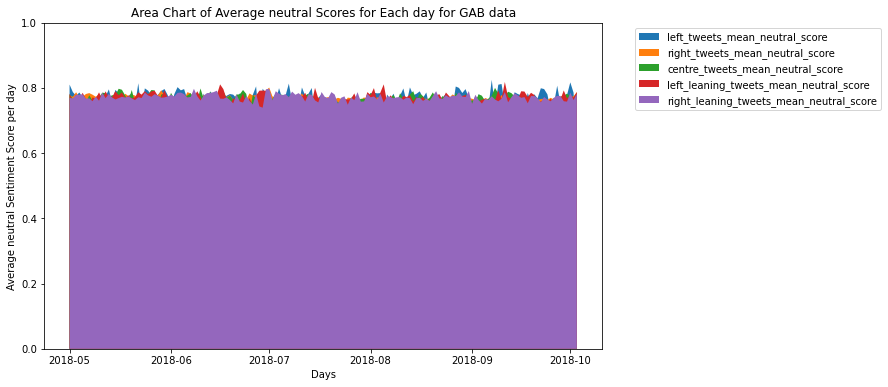

In [115]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set the timestamp column as the index
merged_df.set_index('Date', inplace=True)

# Group by day
merged_df_grouped = merged_df.groupby(pd.Grouper(freq='D'))

# Plotting area chart for each score
plt.figure(figsize=(10, 6))
for score in ['left_tweets_mean_neutral_score', 'right_tweets_mean_neutral_score', 'centre_tweets_mean_neutral_score', 'left_leaning_tweets_mean_neutral_score', 'right_leaning_tweets_mean_neutral_score']:
    plt.stackplot(merged_df_grouped.groups.keys(), merged_df_grouped[score].sum(), alpha=1)


plt.legend(['left_tweets_mean_neutral_score', 'right_tweets_mean_neutral_score', 'centre_tweets_mean_neutral_score', 'left_leaning_tweets_mean_neutral_score', 'right_leaning_tweets_mean_neutral_score'],loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Days')
plt.ylabel('Average neutral Sentiment Score per day')
plt.title('Area Chart of Average neutral Scores for Each day for GAB data')
plt.ylim(0, 1)
#plt.grid(True)
plt.show()


In [116]:
"""
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

monthly_data = merged_df.groupby(pd.Grouper(key='Date', freq='M')).mean()

# Plot the area chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.stackplot(monthly_data.index, monthly_data.values.T, labels=monthly_data.columns)

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Average neutral Sentiment Scores per month')
plt.title('Monthly neutral Sentiment Scores for political leaned tweets')

# Add legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.show()
"""

"\nmerged_df['Date'] = pd.to_datetime(merged_df['Date'])\n\nmonthly_data = merged_df.groupby(pd.Grouper(key='Date', freq='M')).mean()\n\n# Plot the area chart\nplt.figure(figsize=(10, 6))  # Adjust the figure size as needed\nplt.stackplot(monthly_data.index, monthly_data.values.T, labels=monthly_data.columns)\n\n# Set labels and title\nplt.xlabel('Months')\nplt.ylabel('Average neutral Sentiment Scores per month')\nplt.title('Monthly neutral Sentiment Scores for political leaned tweets')\n\n# Add legend\nplt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')\n\n# Show the chart\nplt.show()\n"

In [117]:
merged_df

,left_tweets_mean_neutral_score,right_tweets_mean_neutral_score,centre_tweets_mean_neutral_score,left_leaning_tweets_mean_neutral_score,right_leaning_tweets_mean_neutral_score
Date,,,,,
2018-05-01,0.810132,0.777376,0.780604,0.782468,0.769060
2018-05-02,0.787055,0.772507,0.765207,0.759083,0.767905
2018-05-03,0.775760,0.786747,0.772353,0.779442,0.778836
2018-05-28,0.778755,0.776895,0.742048,0.775197,0.776187
2018-05-29,0.790193,0.792571,0.779345,0.771135,0.769946
...,...,...,...,...,...
2018-07-06,0.776438,0.765851,0.758872,0.763626,0.780989
2018-07-05,0.766625,0.774172,0.779068,0.770828,0.777192
2018-07-31,0.731442,0.762512,0.768198,0.786897,0.781873


In [118]:
# stacked plots for compund scores

In [119]:
left_compounds={}
right_compounds={}
centre_compounds={}
left_lean_compounds={}
right_lean_compounds={}


In [120]:
for t in left_cache:
    denominator = 0
    numerator =0
    for x in left_cache[t]:
        numerator+=x['compound']
        denominator+=1
    average = numerator/denominator
    left_compounds[t] = average
    

In [121]:
for t in right_cache:
    denominator = 0
    numerator =0
    for x in right_cache[t]:
        numerator+=x['compound']
        denominator+=1
    average = numerator/denominator
    right_compounds[t] = average
    

In [122]:
for t in centre_cache:
    denominator = 0
    numerator =0
    for x in centre_cache[t]:
        numerator+=x['compound']
        denominator+=1
    average = numerator/denominator
    centre_compounds[t] = average
    

In [123]:
for t in left_lean_cache:
    denominator = 0
    numerator =0
    for x in left_lean_cache[t]:
        numerator+=x['compound']
        denominator+=1
    average = numerator/denominator
    left_lean_compounds[t] = average
    

In [124]:
for t in right_lean_cache:
    denominator = 0
    numerator =0
    for x in right_lean_cache[t]:
        numerator+=x['compound']
        denominator+=1
    average = numerator/denominator
    right_lean_compounds[t] = average
    

In [125]:
left_compounds1 = {'Date':left_compounds.keys(), 'compound_scores':left_compounds.values()}
right_compounds1 = {'Date':right_compounds.keys(), 'compound_scores':right_compounds.values()}
centre_compounds1 = {'Date':centre_compounds.keys(), 'compound_scores':centre_compounds.values()}
left_lean_compounds1 = {'Date':left_lean_compounds.keys(), 'compound_scores':left_lean_compounds.values()}
right_lean_compounds1 = {'Date':right_lean_compounds.keys(), 'compound_scores':right_lean_compounds.values()}


In [126]:
left_compounds_df = pd.DataFrame.from_dict(left_compounds1)
right_compounds_df = pd.DataFrame.from_dict(right_compounds1)
centre_compounds_df = pd.DataFrame.from_dict(centre_compounds1)
left_lean_compounds_df = pd.DataFrame.from_dict(left_lean_compounds1)
right_lean_compounds_df = pd.DataFrame.from_dict(right_lean_compounds1)

In [127]:
left_compounds_filtered_df= left_compounds_df[(left_compounds_df['Date']>=pd.Timestamp(2018,5,1)) & (left_compounds_df['Date']<=pd.Timestamp(2018,12,1))]
right_compounds_filtered_df= right_compounds_df[(right_compounds_df['Date']>=pd.Timestamp(2018,5,1)) & (right_compounds_df['Date']<=pd.Timestamp(2018,12,1))]
centre_compounds_filtered_df= centre_compounds_df[(centre_compounds_df['Date']>=pd.Timestamp(2018,5,1)) & (centre_compounds_df['Date']<=pd.Timestamp(2018,12,1))]
left_lean_compounds_filtered_df= left_lean_compounds_df[(left_lean_compounds_df['Date']>=pd.Timestamp(2018,5,1)) & (left_lean_compounds_df['Date']<=pd.Timestamp(2018,12,1))]
right_lean_compounds_filtered_df= right_lean_compounds_df[(right_lean_compounds_df['Date']>=pd.Timestamp(2018,5,1)) & (right_lean_compounds_df['Date']<=pd.Timestamp(2018,12,1))]



/home/srinath/anaconda3/lib/python3.9/site-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


In [128]:
merged_df = pd.merge(left_compounds_filtered_df, right_compounds_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, centre_compounds_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, left_lean_compounds_filtered_df, on='Date', how='inner')
merged_df = pd.merge(merged_df, right_lean_compounds_filtered_df, on='Date', how='inner')


merged_df.columns = ['Date', 'left_tweets_mean_compound_score', 'right_tweets_mean_compound_score', 'centre_tweets_mean_compound_score', 'left_leaning_tweets_mean_compound_score', 'right_leaning_tweets_mean_compound_score']


merged_df['Date'] = pd.to_datetime(merged_df['Date'])

/tmp/ipykernel_873451/3926434668.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'compound_scores_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = pd.merge(merged_df, left_lean_compounds_filtered_df, on='Date', how='inner')


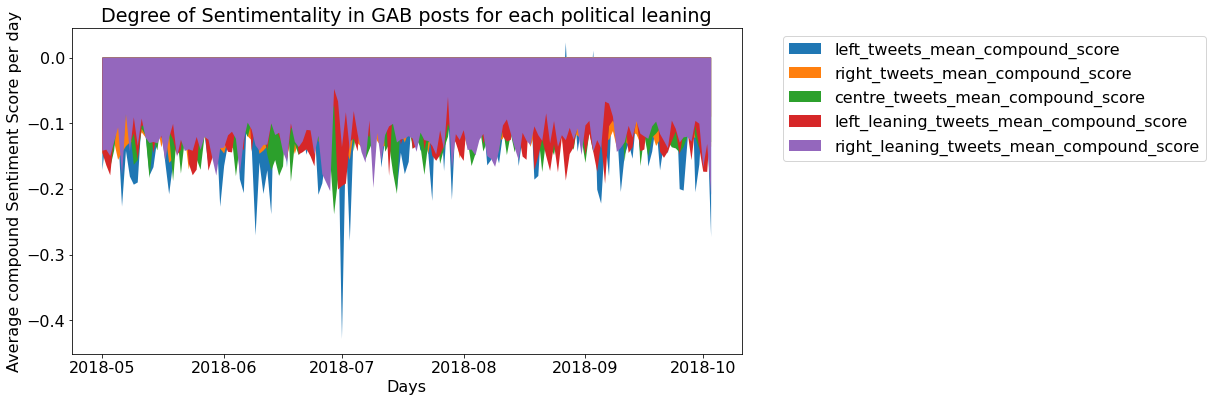

In [129]:
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Set the timestamp column as the index
merged_df.set_index('Date', inplace=True)

# Group by day
merged_df_grouped = merged_df.groupby(pd.Grouper(freq='D'))

# Plotting area chart for each score
plt.figure(figsize=(12, 6))
plt.rcParams['font.size'] = '16'
for score in ['left_tweets_mean_compound_score', 'right_tweets_mean_compound_score', 'centre_tweets_mean_compound_score', 'left_leaning_tweets_mean_compound_score', 'right_leaning_tweets_mean_compound_score']:
    plt.stackplot(merged_df_grouped.groups.keys(), merged_df_grouped[score].sum(), alpha=1)


plt.legend(['left_tweets_mean_compound_score', 'right_tweets_mean_compound_score', 'centre_tweets_mean_compound_score', 'left_leaning_tweets_mean_compound_score', 'right_leaning_tweets_mean_compound_score'],loc='upper left', bbox_to_anchor=(1.05, 1))
plt.xlabel('Days')
plt.ylabel('Average compound Sentiment Score per day')
plt.title('Degree of Sentimentality in GAB posts for each political leaning')
#plt.ylim(0, 1)
#plt.grid(True)
plt.show()


In [130]:
plt.savefig('6.eps', format='eps')

<Figure size 432x288 with 0 Axes>

In [131]:
merged_df

,left_tweets_mean_compound_score,right_tweets_mean_compound_score,centre_tweets_mean_compound_score,left_leaning_tweets_mean_compound_score,right_leaning_tweets_mean_compound_score
Date,,,,,
2018-05-01,-0.171401,-0.147135,-0.106521,-0.145017,-0.141849
2018-05-02,-0.116947,-0.128071,-0.157080,-0.164008,-0.140212
2018-05-03,-0.164390,-0.136267,-0.167109,-0.179229,-0.149845
2018-05-28,-0.162423,-0.133680,-0.117463,-0.172322,-0.124952
2018-05-29,-0.138329,-0.134838,-0.134376,-0.152750,-0.153051
...,...,...,...,...,...
2018-07-06,-0.069997,-0.136683,-0.129692,-0.061521,-0.144070
2018-07-05,-0.132841,-0.130162,-0.088693,-0.142769,-0.116509
2018-07-31,-0.054202,-0.153731,-0.091648,-0.148110,-0.125492


In [132]:
positives =0;
for index, row in merged_df.iterrows():
    if row['left_tweets_mean_compound_score']>0 :
        positives+=1
        
    if row['right_tweets_mean_compound_score']>0 :
        positives+=1
        
    if row['centre_tweets_mean_compound_score']>0 :
        positives+=1
        
    if row['left_leaning_tweets_mean_compound_score']>0 :
        positives+=1
        
    if row['right_leaning_tweets_mean_compound_score']>0 :
        positives+=1
print(positives)
    

2


In [133]:
print(merged_df.to_string())

            left_tweets_mean_compound_score  right_tweets_mean_compound_score  centre_tweets_mean_compound_score  left_leaning_tweets_mean_compound_score  right_leaning_tweets_mean_compound_score
Date                                                                                                                                                                                               
2018-05-01                        -0.171401                         -0.147135                          -0.106521                                -0.145017                                 -0.141849
2018-05-02                        -0.116947                         -0.128071                          -0.157080                                -0.164008                                 -0.140212
2018-05-03                        -0.164390                         -0.136267                          -0.167109                                -0.179229                                 -0.149845
2018-05-28          

In [134]:
import os

# Get the current working directory
current_directory = os.getcwd()

# List all files and directories in the current directory
files_and_directories = os.listdir(current_directory)

# Filter out only the files (excluding directories)
files = [file for file in files_and_directories if os.path.isfile(os.path.join(current_directory, file))]

# Print the list of files
print("List of files in the current directory:")
print(files)


List of files in the current directory:
['.bashrc', '.bash_logout', '.profile', '.bash_history', 'checkGPU.py', '.viminfo', 'MediaBias.xlsx', 'Gab2018.csv', '.condarc', 'tweet_ICWSM.json', 'SARIMA model on media baised data for Gab data.ipynb', 'SARIMA Model and LSTM of time forecasting for tweets.ipynb', 'posts_with_newsURLs.json', 'Time series forecasting for dataset2.ipynb', 'spektral_utilities.py', 'spektral_gcn.py', '.txt', 'time series forecasting for 6 labels for other dataset.ipynb', 'time series forecasting for 6 labels.ipynb', 'Plots.ipynb', 'Average negative scores per month for dataset-1.xlsx', 'Plots-2.ipynb', '1.jpg', '5.eps', '6.eps']
